#Assignment 4

##2 PART A: Maximum Likelihood Point Estimation

###2.1 Exercise A:1 - ML Estimation of µ and σ for a Gaussian pdf

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import binom
import math

a)

In [ ]:
N = 50
D = np.random.normal(2,0.1,N)


b)

In [ ]:
mu_first =0
mu_last =3
delta_mu =0.005
sigma_first =0.001
sigma_last =3
delta_sigma =0.001

mu_array= np.append(np.arange(mu_first, mu_last,delta_mu),mu_last)
sigma_array= np.append(np.arange(sigma_first, sigma_last,delta_sigma),sigma_last)

Nmu = len(mu_array)
Nsigma = len(sigma_array)

L = np.zeros((Nmu, Nsigma))

#Funktionen sket sig helt
def norm(mu, sigma, x_n):
  normal_value = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x_n-mu)**2)/(2*sigma**2)
  return normal_value

for i in range(Nmu):
  for j in range(Nsigma):
    mu_i = mu_first+i*delta_mu
    sigma_j = sigma_first+j*delta_sigma
    L[i,j] = np.prod((1/np.sqrt(2*np.pi*sigma_j**2)) * np.exp(-0.5*(D-mu_i)**2/sigma_j**2))


In [ ]:
print(np.shape(L))
print(Nmu)
print(Nsigma)

(601, 3000)
601
3000


c)

In [ ]:
imax, jmax = np.unravel_index(np.argmax(L), L.shape)
mu_best = mu_array[imax]
sigma_best = sigma_array[jmax]
L_max = L[imax, jmax]
print(f"Maximum likelihood estimate: μ = {mu_best}, σ = {sigma_best}, Lmax = {L_max}")

Maximum likelihood estimate: μ = 2.02, σ = 0.09, Lmax = 3.110382521257368e+21


###2.2 Exercise A:2 - Maximum Likelihood Estimation of a proportion

In [ ]:
import math

N=20
k=4

q_values = np.arange(0, 1+0.01, 0.01)
L_values = []

for i in range(len(q_values)):
   likelihood= math.pow(q_values[i], k) * math.pow(1 - q_values[i], N - k) * math.comb(N, k)
   L_values.append(likelihood)


qbest = q_values[L_values.index(max(L_values))]
print('best q =',qbest)

best q = 0.2


##3 PART B: Bayesian Point and Interval Estimates

###3.1 Exercise B:1 - Read theory about Bayesian parameter estimation

a) In ML estimation, we find the values of the parameters that maximize the likelihood function of the observed data, assuming that the data are generated from a particular distribution with fixed parameters. The likelihood function gives the probability of observing the data given the model parameters. Therefore, ML estimation involves finding the values of the parameters that make the observed data the most probable.

On the other hand, MAP estimation incorporates prior knowledge or beliefs about the parameters into the estimation process. In other words, it combines the likelihood function with a prior probability distribution over the parameters. The resulting estimate is the mode of the posterior distribution of the parameters, which combines the prior information with the information from the observed data.

b)When we have little prior knowledge about the parameter, the posterior PDF will be more heavily influenced by the observed data, which means that the posterior PDF will be relatively narrower, indicating a higher degree of certainty about the parameter value.

Conversely, when we have a lot of prior knowledge about the parameter, the posterior PDF will be less influenced by the observed data and will be relatively wider, indicating more uncertainty about the parameter value.

###3.2 Exercise B:2 - Uncertainty about a ML estimate

In [ ]:
L_norm = L/np.sum(L)
L_norm

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.07657885e-73, 4.03867647e-73, 4.00111939e-73],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.30787323e-73, 4.26766333e-73, 4.22782140e-73],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.55165758e-73, 4.50900668e-73, 4.46674784e-73],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.44932804e-69, 1.42804624e-69, 1.40708211e-69],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.40933764e-69, 1.38866896e-69, 1.36830841e-69],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.37026008e-69, 1.35018981e-69, 1.33041836e-69]])

In [ ]:
np.sum([[0, 1], [1, 5],[1,2]])

10

In [ ]:
mu_values = np.arange(mu_first, mu_last+delta_mu, delta_mu)
sigma_values = np.arange(sigma_first, sigma_last+delta_sigma, delta_sigma)

print(len(mu_values))
print(len(sigma_values))


601
3000


In [ ]:
posterior_approx = np.zeros((Nmu, Nsigma))
for i in range(Nmu):
    for j in range(Nsigma):
      posterior_approx[i,j]=L_norm[i,j]/(delta_mu*delta_sigma)

posterior_approx

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.15315771e-68, 8.07735294e-68, 8.00223879e-68],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.61574646e-68, 8.53532665e-68, 8.45564281e-68],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.10331516e-68, 9.01801336e-68, 8.93349568e-68],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.89865608e-64, 2.85609248e-64, 2.81416423e-64],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.81867528e-64, 2.77733792e-64, 2.73661681e-64],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.74052017e-64, 2.70037963e-64, 2.66083671e-64]])

Text(0.5, 0, 'mu')

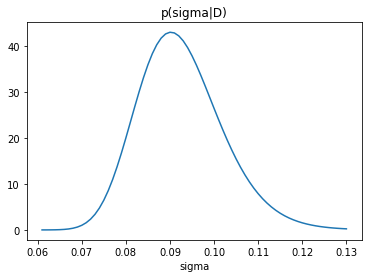

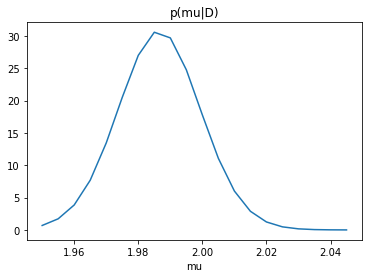

In [ ]:
import matplotlib . pyplot as plot

#the sum of L_norm across all columns of row i
sums_per_rows_in_L_norm = np.sum(L_norm, axis=1)

#the sum of L_norm across all rows of column j
sums_per_cols_in_L_norm = np.sum(L_norm, axis=0)

marginal_mu_posterior_approx = sums_per_rows_in_L_norm/delta_mu
marginal_sigma_posterior_approx = sums_per_cols_in_L_norm/delta_sigma


plt.figure(1)
plt.plot(sigma_array[60:130],marginal_sigma_posterior_approx[60:130])
plt.title('p(sigma|D)')
plt.xlabel('sigma')

plt.figure(2)
plt.plot(mu_array[390:410],marginal_mu_posterior_approx[390:410])
plt.title('p(mu|D)')
plt.xlabel('mu')

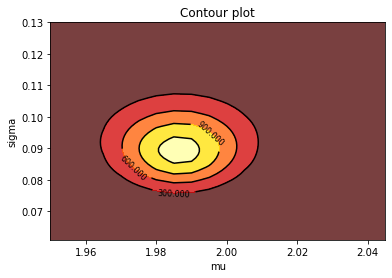

In [ ]:
# PRESENT THE posterior THAT CONTAINS THE CALCULATED VALUES FOR THE JOINT POSTERIOR
# DISTRIBUTION

mu_grid = mu_array[390:410]
sigma_grid = sigma_array[60:130]
no_of_contour_levels = 4

plot . contourf ( mu_grid , sigma_grid , np . transpose ( posterior_approx[390:410 ,60:130] ) , no_of_contour_levels , alpha =.75 , cmap = plot .cm . hot )
C = plot . contour ( mu_grid , sigma_grid , np . transpose ( posterior_approx[390:410 ,60:130] ) , no_of_contour_levels , colors ='black')
plot . clabel (C , inline =1 , fontsize =8)
# Provide a title for the contour plot
plot . title ('Contour plot')
# Set x axis label for the contour plot
plot . xlabel ('mu')
# Set y axis label for the contour plot
plot . ylabel ('sigma')
plot . show ()


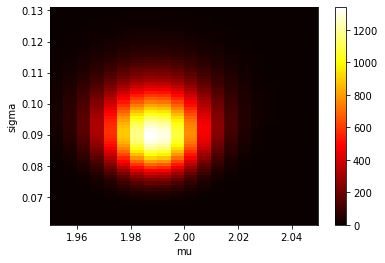

In [ ]:
# CUT OUT A DESIRED PART OF THE MATRIX posterior THAT CONTAINS THE
# CALCULATED VALUES FOR THE JOINT POSTERIOR DISTRIBUTION . THEN
# TRANSPOSE IT TO MAKE mu CORRESPOND TO THE X- AXIS . FINALLY FLIP
# UPSIDE - DOWN SO THAT THE LAST ROW OF THE RESULTING MATRIX X CORRESPONDS
#TO TO THE SMALLEST VALUE OF sigma (AND SO THAT THE AND SO THAT THE FIRST
# ROW OF X CORRESPONDS TO THE LARGEST VALUE OF sigma )
import numpy as np
import matplotlib . pyplot as plot

X= np . flipud ( np . asmatrix ( np . transpose ( posterior_approx [390:410 ,60:130]) ))
fig , ax = plt . subplots ()

mu_grid = mu_array
sigma_grid = sigma_array

mu_min = mu_grid [390]
mu_max = mu_grid [410]
sigma_min = sigma_grid [60]
sigma_max = sigma_grid [130]

extent = [ mu_min , mu_max , sigma_min , sigma_max ]
img = ax . imshow (X , extent = extent , cmap = plot . cm . hot , aspect ='auto')
plt . grid ( False )
fig . colorbar ( img )
ax . set_xlabel ('mu')
ax . set_ylabel ('sigma');


###3.3 Exercise B:3 - ML estimate uncertainty with same/more/less data

a)

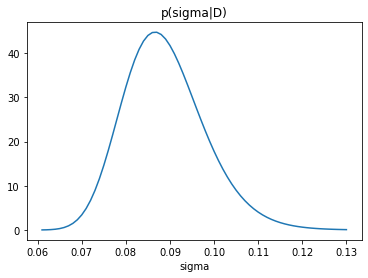

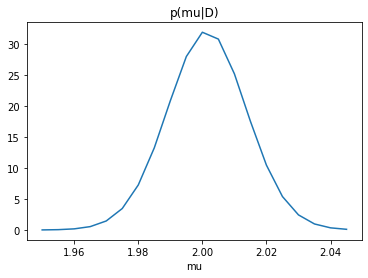

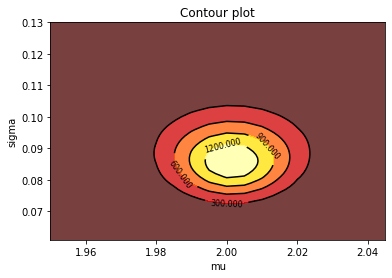

<Figure size 432x288 with 0 Axes>

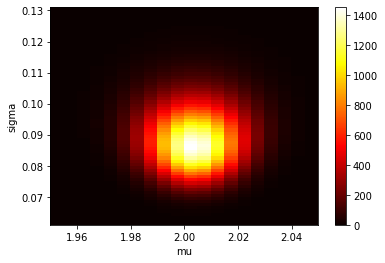

In [ ]:
N = 50
D2 = np.random.normal(2,0.1,N)

L = np.zeros((Nmu, Nsigma))

for i in range(Nmu):
  for j in range(Nsigma):
    mu_i = mu_first+i*delta_mu
    sigma_j = sigma_first+j*delta_sigma
    L[i,j] = np.prod((1/np.sqrt(2*np.pi*sigma_j**2)) * np.exp(-0.5*(D2-mu_i)**2/sigma_j**2))

L_norm = L/np.sum(L)

posterior_approx = np.zeros((Nmu, Nsigma))
for i in range(Nmu):
    for j in range(Nsigma):
      posterior_approx[i,j]=L_norm[i,j]/(delta_mu*delta_sigma)


#the sum of L_norm across all columns of row i
sums_per_rows_in_L_norm = np.sum(L_norm, axis=1)

#the sum of L_norm across all rows of column j
sums_per_cols_in_L_norm = np.sum(L_norm, axis=0)

marginal_mu_posterior_approx = sums_per_rows_in_L_norm/delta_mu
marginal_sigma_posterior_approx = sums_per_cols_in_L_norm/delta_sigma

plt.figure(1)
plt.plot(sigma_array[60:130],marginal_sigma_posterior_approx[60:130])
plt.title('p(sigma|D)')
plt.xlabel('sigma')

plt.figure(2)
plt.plot(mu_array[390:410],marginal_mu_posterior_approx[390:410])
plt.title('p(mu|D)')
plt.xlabel('mu')


mu_grid = mu_array[390:410]
sigma_grid = sigma_array[60:130]
no_of_contour_levels = 4

plt.figure(3)
plot . contourf ( mu_grid , sigma_grid , np . transpose ( posterior_approx[390:410 ,60:130] ) , no_of_contour_levels , alpha =.75 , cmap = plot .cm . hot )
C = plot . contour ( mu_grid , sigma_grid , np . transpose ( posterior_approx[390:410 ,60:130] ) , no_of_contour_levels , colors ='black')
plot . clabel (C , inline =1 , fontsize =8)
# Provide a title for the contour plot
plot . title ('Contour plot')
# Set x axis label for the contour plot
plot . xlabel ('mu')
# Set y axis label for the contour plot
plot . ylabel ('sigma')
plot . show ()


plt.figure(4)
X= np . flipud ( np . asmatrix ( np . transpose ( posterior_approx [390:410 ,60:130]) ))
fig , ax = plt . subplots ()

mu_grid = mu_array
sigma_grid = sigma_array

mu_min = mu_grid [390]
mu_max = mu_grid [410]
sigma_min = sigma_grid [60]
sigma_max = sigma_grid [130]

extent = [ mu_min , mu_max , sigma_min , sigma_max ]
img = ax . imshow (X , extent = extent , cmap = plot . cm . hot , aspect ='auto')
plt . grid ( False )
fig . colorbar ( img )
ax . set_xlabel ('mu')
ax . set_ylabel ('sigma');

b)

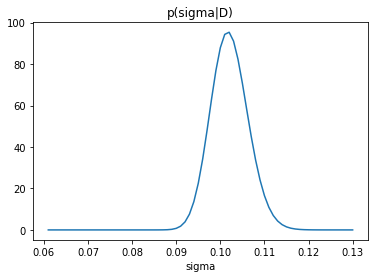

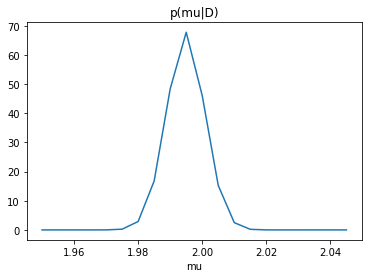

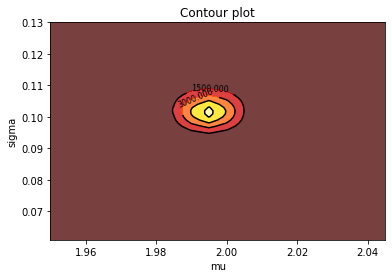

<Figure size 432x288 with 0 Axes>

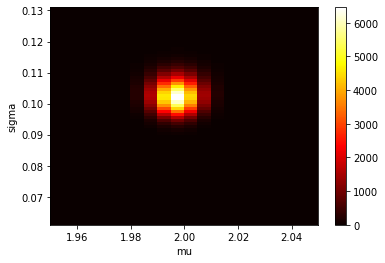

In [ ]:
N = 300
D2 = np.random.normal(2,0.1,N)

L = np.zeros((Nmu, Nsigma))

for i in range(Nmu):
  for j in range(Nsigma):
    mu_i = mu_first+i*delta_mu
    sigma_j = sigma_first+j*delta_sigma
    L[i,j] = np.prod((1/np.sqrt(2*np.pi*sigma_j**2)) * np.exp(-0.5*(D2-mu_i)**2/sigma_j**2))

L_norm = L/np.sum(L)

posterior_approx = np.zeros((Nmu, Nsigma))
for i in range(Nmu):
    for j in range(Nsigma):
      posterior_approx[i,j]=L_norm[i,j]/(delta_mu*delta_sigma)


#the sum of L_norm across all columns of row i
sums_per_rows_in_L_norm = np.sum(L_norm, axis=1)

#the sum of L_norm across all rows of column j
sums_per_cols_in_L_norm = np.sum(L_norm, axis=0)

marginal_mu_posterior_approx = sums_per_rows_in_L_norm/delta_mu
marginal_sigma_posterior_approx = sums_per_cols_in_L_norm/delta_sigma

plt.figure(1)
plt.plot(sigma_array[60:130],marginal_sigma_posterior_approx[60:130])
plt.title('p(sigma|D)')
plt.xlabel('sigma')

plt.figure(2)
plt.plot(mu_array[390:410],marginal_mu_posterior_approx[390:410])
plt.title('p(mu|D)')
plt.xlabel('mu')


mu_grid = mu_array[390:410]
sigma_grid = sigma_array[60:130]
no_of_contour_levels = 4

plt.figure(3)
plot . contourf ( mu_grid , sigma_grid , np . transpose ( posterior_approx[390:410 ,60:130] ) , no_of_contour_levels , alpha =.75 , cmap = plot .cm . hot )
C = plot . contour ( mu_grid , sigma_grid , np . transpose ( posterior_approx[390:410 ,60:130] ) , no_of_contour_levels , colors ='black')
plot . clabel (C , inline =1 , fontsize =8)
# Provide a title for the contour plot
plot . title ('Contour plot')
# Set x axis label for the contour plot
plot . xlabel ('mu')
# Set y axis label for the contour plot
plot . ylabel ('sigma')
plot . show ()


plt.figure(4)
X= np . flipud ( np . asmatrix ( np . transpose ( posterior_approx [390:410 ,60:130]) ))
fig , ax = plt . subplots ()

mu_grid = mu_array
sigma_grid = sigma_array

mu_min = mu_grid [390]
mu_max = mu_grid [410]
sigma_min = sigma_grid [60]
sigma_max = sigma_grid [130]

extent = [ mu_min , mu_max , sigma_min , sigma_max ]
img = ax . imshow (X , extent = extent , cmap = plot . cm . hot , aspect ='auto')
plt . grid ( False )
fig . colorbar ( img )
ax . set_xlabel ('mu')
ax . set_ylabel ('sigma');

c)

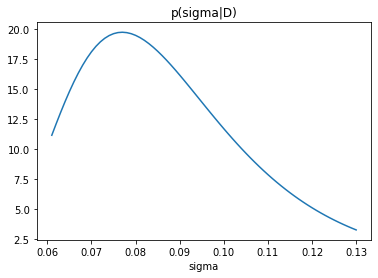

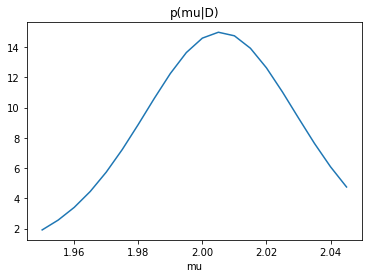

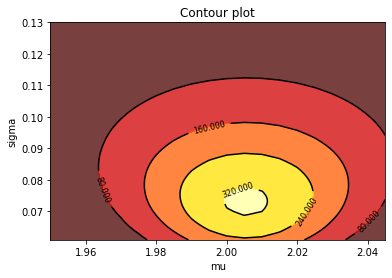

<Figure size 432x288 with 0 Axes>

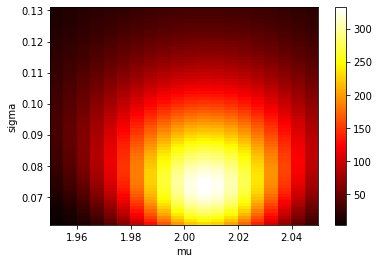

In [ ]:
N = 10
D2 = np.random.normal(2,0.1,N)

L = np.zeros((Nmu, Nsigma))

for i in range(Nmu):
  for j in range(Nsigma):
    mu_i = mu_first+i*delta_mu
    sigma_j = sigma_first+j*delta_sigma
    L[i,j] = np.prod((1/np.sqrt(2*np.pi*sigma_j**2)) * np.exp(-0.5*(D2-mu_i)**2/sigma_j**2))

L_norm = L/np.sum(L)

posterior_approx = np.zeros((Nmu, Nsigma))
for i in range(Nmu):
    for j in range(Nsigma):
      posterior_approx[i,j]=L_norm[i,j]/(delta_mu*delta_sigma)


#the sum of L_norm across all columns of row i
sums_per_rows_in_L_norm = np.sum(L_norm, axis=1)

#the sum of L_norm across all rows of column j
sums_per_cols_in_L_norm = np.sum(L_norm, axis=0)

marginal_mu_posterior_approx = sums_per_rows_in_L_norm/delta_mu
marginal_sigma_posterior_approx = sums_per_cols_in_L_norm/delta_sigma

plt.figure(1)
plt.plot(sigma_array[60:130],marginal_sigma_posterior_approx[60:130])
plt.title('p(sigma|D)')
plt.xlabel('sigma')

plt.figure(2)
plt.plot(mu_array[390:410],marginal_mu_posterior_approx[390:410])
plt.title('p(mu|D)')
plt.xlabel('mu')


mu_grid = mu_array[390:410]
sigma_grid = sigma_array[60:130]
no_of_contour_levels = 4

plt.figure(3)
plot . contourf ( mu_grid , sigma_grid , np . transpose ( posterior_approx[390:410 ,60:130] ) , no_of_contour_levels , alpha =.75 , cmap = plot .cm . hot )
C = plot . contour ( mu_grid , sigma_grid , np . transpose ( posterior_approx[390:410 ,60:130] ) , no_of_contour_levels , colors ='black')
plot . clabel (C , inline =1 , fontsize =8)
# Provide a title for the contour plot
plot . title ('Contour plot')
# Set x axis label for the contour plot
plot . xlabel ('mu')
# Set y axis label for the contour plot
plot . ylabel ('sigma')
plot . show ()


plt.figure(4)
X= np . flipud ( np . asmatrix ( np . transpose ( posterior_approx [390:410 ,60:130]) ))
fig , ax = plt . subplots ()

mu_grid = mu_array
sigma_grid = sigma_array

mu_min = mu_grid [390]
mu_max = mu_grid [410]
sigma_min = sigma_grid [60]
sigma_max = sigma_grid [130]

extent = [ mu_min , mu_max , sigma_min , sigma_max ]
img = ax . imshow (X , extent = extent , cmap = plot . cm . hot , aspect ='auto')
plt . grid ( False )
fig . colorbar ( img )
ax . set_xlabel ('mu')
ax . set_ylabel ('sigma');

###3.4 Exercise B:4 - Posterior for an unknown classifier error rate q

a)

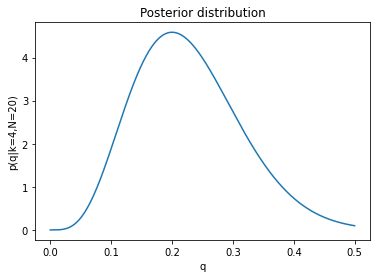

In [ ]:
N=20
k=4

J = 1000
q = np.linspace(0, 0.5, J)

Pkq = np.math.comb(N, k) * q**k * (1-q)**(N-k)

theta = np.linspace(0,1,J)
delta_theta = 1/J

PkN = delta_theta*np.sum(np.math.comb(N, k) * theta**k * (1-theta)**(N-k))

PqkN = Pkq/PkN

plt.plot(q, PqkN)
plt.xlabel('q')
plt.ylabel('p(q|k=4,N=20)')
plt.title('Posterior distribution')
plt.show()

b)

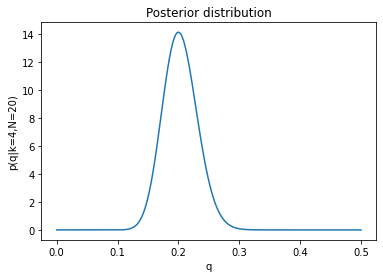

In [ ]:
N=200
k=40

J = 1000
q = np.linspace(0, 0.5, J)

Pkq = np.math.comb(N, k) * q**k * (1-q)**(N-k)

theta = np.linspace(0,1,J)
delta_theta = 1/J

PkN = delta_theta*np.sum(np.math.comb(N, k) * theta**k * (1-theta)**(N-k))

PqkN = Pkq/PkN

plt.plot(q, PqkN)
plt.xlabel('q')
plt.ylabel('p(q|k=4,N=20)')
plt.title('Posterior distribution')
plt.show()

c)

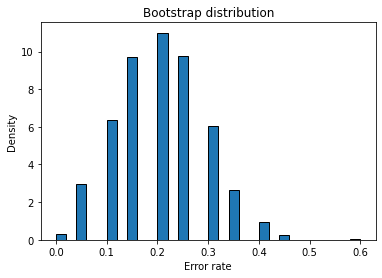

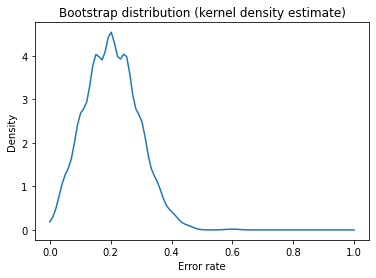

In [ ]:
from scipy.stats import gaussian_kde

N = 20
k = 4
n_samples = 1000

#Create urn
np_values=np.asarray (['red','white'])
np_counts=np.asarray ([4,16])
np_urn=np.repeat(np_values , np_counts)

result = np.zeros(n_samples,)

for i in range(n_samples):
  np_draw_with_replacement=np.random.choice(np_urn , size=N, p=None , replace=True)
  number_of_errors = np.count_nonzero(np_draw_with_replacement=='red')
  fraction = number_of_errors/N
  result[i]=fraction

# Plot histogram
plt.hist(result, bins=30, density=True, ec='black')
plt.xlabel('Error rate')
plt.ylabel('Density')
plt.title('Bootstrap distribution')
plt.show()

# Plot kernel density estimate
kde = gaussian_kde(result)
x = np.linspace(0, 1, 100)
y = kde(x)
plt.plot(x, y)
plt.xlabel('Error rate')
plt.ylabel('Density')
plt.title('Bootstrap distribution (kernel density estimate)')
plt.show()

d) c) looks very much like a) which is reasonable as we have the same number of errors and tries.